 - Trabalho para a disciplina de aprendizado de máquina: Criar um classificador para decidir se um cliente é prop
ício para receber crédito ou não.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



In [ ]:
data_treino = pd.read_csv("/content/conjunto_de_treinamento.csv")
data_teste = pd.read_csv("/content/conjunto_de_teste.csv")

In [ ]:
data_treino

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,...,N,,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,...,N,,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,...,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,...,N,,0,9.0,5.0,NaN,NaN,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,10,presencial,1,M,27,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,308.0,308.0,0
19996,19997,1,20,presencial,1,F,26,2,1,0,...,N,,0,9.0,2.0,0.0,0.0,639.0,639.0,0
19997,19998,1,10,internet,1,F,63,2,0,0,...,N,,0,9.0,1.0,NaN,NaN,486.0,486.0,0
19998,19999,1,5,internet,1,F,84,1,0,0,...,N,,0,NaN,NaN,NaN,NaN,590.0,590.0,0


In [ ]:
#logo são cerca de 42 colunas, contando com a coluna alvo
len(data_treino.columns)

42

In [ ]:
# Aqui, conseguimos ver que existem diversas colunas com dados de tipo texto (" string "), logo vamos transformar para dados
#numéricos
data_treino.iloc[1,:]

,1
id_solicitante,2
produto_solicitado,1
dia_vencimento,25
forma_envio_solicitacao,internet
tipo_endereco,1
sexo,F
idade,38
estado_civil,1
qtde_dependentes,0
grau_instrucao,0


In [ ]:
# podemos ver que existem, muitas linhas com valores Nan, logo vamos retira-los
data_treino = data_treino.dropna(axis=1)
data_teste = data_teste.dropna(axis=1)


In [ ]:
labelencoder = LabelEncoder()
data_treino["forma_envio_solicitacao"]= labelencoder.fit_transform(data_treino["forma_envio_solicitacao"])
data_treino["sexo"]= labelencoder.fit_transform(data_treino["sexo"])
data_treino["estado_onde_nasceu"]= labelencoder.fit_transform(data_treino["estado_onde_nasceu"])
data_treino["estado_onde_reside"]= labelencoder.fit_transform(data_treino["estado_onde_reside"])
data_treino["possui_telefone_residencial"]= labelencoder.fit_transform(data_treino["possui_telefone_residencial"])
data_treino["possui_telefone_celular"]= labelencoder.fit_transform(data_treino["possui_telefone_celular"])
data_treino["vinculo_formal_com_empresa"]= labelencoder.fit_transform(data_treino["vinculo_formal_com_empresa"])
data_treino["possui_telefone_trabalho"]= labelencoder.fit_transform(data_treino["possui_telefone_trabalho"])
data_treino["estado_onde_trabalha"]= labelencoder.fit_transform(data_treino["estado_onde_trabalha"])


<ipython-input-286-79e793f70452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_treino["forma_envio_solicitacao"]= labelencoder.fit_transform(data_treino["forma_envio_solicitacao"])
<ipython-input-286-79e793f70452>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_treino["sexo"]= labelencoder.fit_transform(data_treino["sexo"])
<ipython-input-286-79e793f70452>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
data_treino["codigo_area_telefone_trabalho"] = data_treino["codigo_area_telefone_trabalho"].dropna()

<ipython-input-287-d17689ee7a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_treino["codigo_area_telefone_trabalho"] = data_treino["codigo_area_telefone_trabalho"].dropna()


In [ ]:
#Organizando o index
data_treino.reset_index(drop=True , inplace=True)
data_treino

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,valor_patrimonio_pessoal,possui_carro,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,2,1,2,85,2,0,0,...,0.0,1,0,0,0,,0,600.0,600.0,0
1,2,1,25,1,1,1,38,1,0,0,...,0.0,0,0,0,0,,0,492.0,492.0,0
2,3,1,20,1,1,1,37,2,0,0,...,0.0,0,0,0,0,,0,450.0,450.0,1
3,4,1,20,1,1,2,37,1,1,0,...,0.0,0,1,23,1,54,0,932.0,932.0,1
4,5,7,1,1,1,1,51,1,3,0,...,0.0,1,1,5,0,,0,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,10,2,1,2,27,2,0,0,...,0.0,1,1,0,0,,0,308.0,308.0,0
19996,19997,1,20,2,1,1,26,2,1,0,...,0.0,1,1,0,0,,0,639.0,639.0,0
19997,19998,1,10,1,1,1,63,2,0,0,...,0.0,0,0,0,0,,0,486.0,486.0,0
19998,19999,1,5,1,1,1,84,1,0,0,...,0.0,0,0,0,0,,0,590.0,590.0,0


In [ ]:
data_treino = data_treino.drop("codigo_area_telefone_trabalho", axis=1)
data_teste = data_teste.drop("codigo_area_telefone_trabalho", axis=1)

In [ ]:
data_treino = data_treino.drop("codigo_area_telefone_residencial", axis=1)
data_teste = data_teste.drop("codigo_area_telefone_residencial", axis=1)

In [ ]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_solicitante                   5000 non-null   int64  
 1   produto_solicitado               5000 non-null   int64  
 2   dia_vencimento                   5000 non-null   int64  
 3   forma_envio_solicitacao          5000 non-null   object 
 4   tipo_endereco                    5000 non-null   int64  
 5   sexo                             5000 non-null   object 
 6   idade                            5000 non-null   int64  
 7   estado_civil                     5000 non-null   int64  
 8   qtde_dependentes                 5000 non-null   int64  
 9   grau_instrucao                   5000 non-null   int64  
 10  nacionalidade                    5000 non-null   int64  
 11  estado_onde_nasceu               5000 non-null   object 
 12  estado_onde_reside  

In [ ]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_solicitante                   20000 non-null  int64  
 1   produto_solicitado               20000 non-null  int64  
 2   dia_vencimento                   20000 non-null  int64  
 3   forma_envio_solicitacao          20000 non-null  int64  
 4   tipo_endereco                    20000 non-null  int64  
 5   sexo                             20000 non-null  int64  
 6   idade                            20000 non-null  int64  
 7   estado_civil                     20000 non-null  int64  
 8   qtde_dependentes                 20000 non-null  int64  
 9   grau_instrucao                   20000 non-null  int64  
 10  nacionalidade                    20000 non-null  int64  
 11  estado_onde_nasceu               20000 non-null  int64  
 12  estado_onde_reside

In [ ]:
y= data_treino.loc[:,"inadimplente"]
X=data_treino.loc[:, [col for col in data_treino.columns if col != "inadimplente"]]

In [ ]:
# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = RandomForestClassifier(random_state=1,n_estimators=300, max_depth=12  , max_leaf_nodes=12, criterion="gini")

In [ ]:
# Aqui, eu treino o modelo de RandomForest, com apenas dados de treino
modelo.fit(X,y)

RandomForestClassifier(max_depth=12, max_leaf_nodes=12, n_estimators=300,
                       random_state=1)

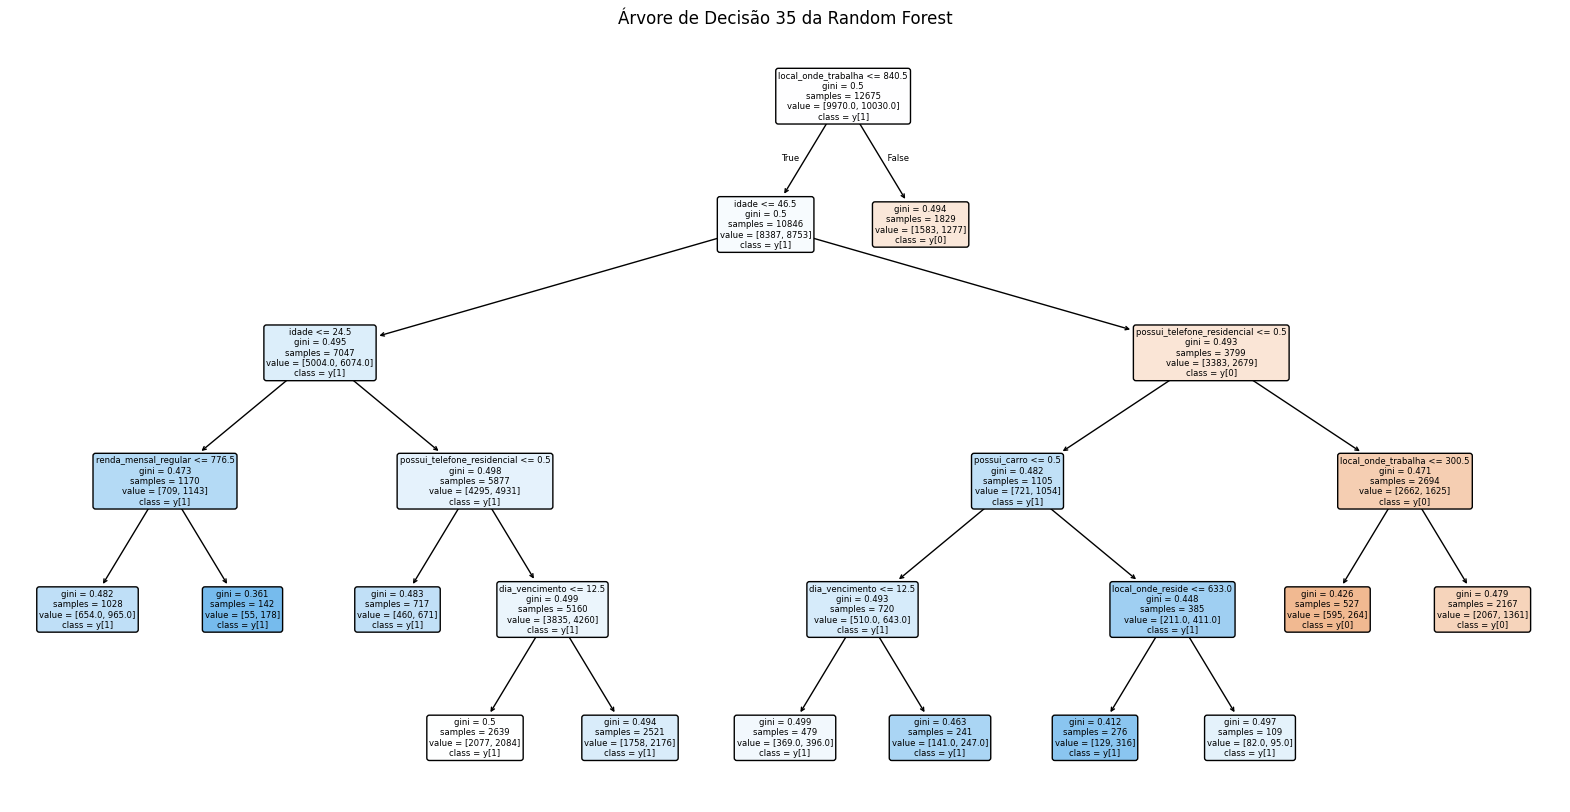

In [ ]:
# imprimindo a árvore

tree_index = 35  # Número da árvore que você quer visualizar
tree_to_visualize = modelo.estimators_[tree_index]  # Acesso à árvore específica

# Visualizando a árvore
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize,
          filled=True,
          feature_names=data_treino.columns[:-1],  # Nomes das features
          class_names=True,  # Classes
          rounded=True)
plt.title(f"Árvore de Decisão {tree_index} da Random Forest")
plt.show()

- Agora, vamos começar a trabalhar nossos dados de teste

In [ ]:
data_teste.reset_index(drop=True, inplace=True)
data_teste

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,qtde_contas_bancarias,qtde_contas_bancarias_especiais,valor_patrimonio_pessoal,possui_carro,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,meses_no_trabalho,local_onde_reside,local_onde_trabalha
0,20001,1,25,presencial,1,M,37,2,0,0,...,1,1,0.0,1,N,,N,0,384.0,384.0
1,20002,1,10,internet,1,F,31,2,0,0,...,0,0,0.0,0,Y,RJ,N,0,275.0,275.0
2,20003,1,10,internet,1,F,18,2,0,0,...,0,0,0.0,0,Y,RS,N,0,948.0,948.0
3,20004,1,10,presencial,1,F,55,2,0,0,...,1,1,0.0,1,N,,N,0,581.0,581.0
4,20005,1,10,presencial,1,F,55,1,0,0,...,1,1,0.0,1,N,,N,0,573.0,573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24996,1,10,presencial,1,F,49,2,1,0,...,1,1,0.0,1,N,,N,0,652.0,652.0
4996,24997,1,5,internet,1,M,18,2,0,0,...,0,0,0.0,0,N,,N,0,855.0,855.0
4997,24998,1,10,presencial,1,F,29,1,0,0,...,0,0,0.0,0,N,,N,0,371.0,371.0
4998,24999,1,25,internet,1,F,31,2,2,0,...,0,0,0.0,0,Y,,N,0,670.0,670.0


In [ ]:
labelencoder = LabelEncoder()
data_teste["forma_envio_solicitacao"]= labelencoder.fit_transform(data_teste["forma_envio_solicitacao"])
data_teste["sexo"]= labelencoder.fit_transform(data_teste["sexo"])
data_teste["estado_onde_nasceu"]= labelencoder.fit_transform(data_teste["estado_onde_nasceu"])
data_teste["estado_onde_reside"]= labelencoder.fit_transform(data_teste["estado_onde_reside"])
data_teste["possui_telefone_residencial"]= labelencoder.fit_transform(data_teste["possui_telefone_residencial"])
data_teste["possui_telefone_celular"]= labelencoder.fit_transform(data_teste["possui_telefone_celular"])
data_teste["vinculo_formal_com_empresa"]= labelencoder.fit_transform(data_teste["vinculo_formal_com_empresa"])
data_teste["possui_telefone_trabalho"]= labelencoder.fit_transform(data_teste["possui_telefone_trabalho"])
data_teste["estado_onde_trabalha"]= labelencoder.fit_transform(data_teste["estado_onde_trabalha"])

In [ ]:
# previsao = modelo.predict(X_teste)
previsao= modelo.predict(data_teste)

In [ ]:
# Para problemas de classificação
# accuracy = accuracy_score(y_teste, previsao)
# precision = precision_score(y_teste, previsao, average='weighted')
# recall= recall_score(y_teste, previsao, average='weighted')
# f1= f1_score(y_teste,previsao, average='weighted')

# print(f'precisão:{precision}, acurácia:{accuracy}, recall:{recall}, f1:{f1}')

In [ ]:
len(previsao)

5000

In [ ]:
dict_previsao={"inadimplente":previsao, "id_solicitante":data_teste["id_solicitante"]}
df_previsao= pd.DataFrame(dict_previsao)
df_previsao


,inadimplente,id_solicitante
0,1,20001
1,1,20002
2,1,20003
3,0,20004
4,0,20005
...,...,...
4995,1,24996
4996,0,24997
4997,1,24998
4998,1,24999


In [ ]:
df_previsao.to_csv("previsao2.csv",index=False)

In [ ]:
df_previsao2=pd.read_csv("/content/previsao2.csv")
df_previsao2


,inadimplente,id_solicitante
0,1,20001
1,1,20002
2,1,20003
3,0,20004
4,0,20005
...,...,...
4995,1,24996
4996,0,24997
4997,1,24998
4998,1,24999
